# Habituation Dishabituation Data

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
import seaborn as sns


# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *


In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc_csvs"
# brain_region = '#FFAF00'


experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs"
brain_region = '#15616F'

In [3]:
# Define the time segments to remove for specific subjects
time_segments_to_remove = {
    'n6': [(150,200)],
    'n7': [(90, 130)],
    'n5': [(310,326)]
}


In [4]:
group_data = GroupTDTData(experiment_path, csv_base_path)
# Batch process the data, removing the specified time segments for subjects
group_data.batch_process(time_segments_to_remove=time_segments_to_remove)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n1-240507-080133\Notes.txt
read from t=0s to t=1573.39s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n2-240507-093913\Notes.txt
read from t=0s to t=1511.09s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n3-240507-115440\Notes.txt
read from t=0s to t=1494.38s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n4-240507-140651\Notes.txt
read from t=0s to t=1318.23s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n6-240821-100116\Notes.txt
read from t=0s to t=1335.06s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n7-240821-114717\Notes.txt
read from t=0s to t=1309.86s
Processing n1-240507-0

In [5]:
group_data.hab_dishab_processing()

Hab_Dishab Processing n1-240507-080133...
Hab_Dishab Processing n2-240507-093913...
Hab_Dishab Processing n3-240507-115440...
Hab_Dishab Processing n4-240507-140651...
Hab_Dishab Processing n6-240821-100116...
Hab_Dishab Processing n7-240821-114717...


## Total duration

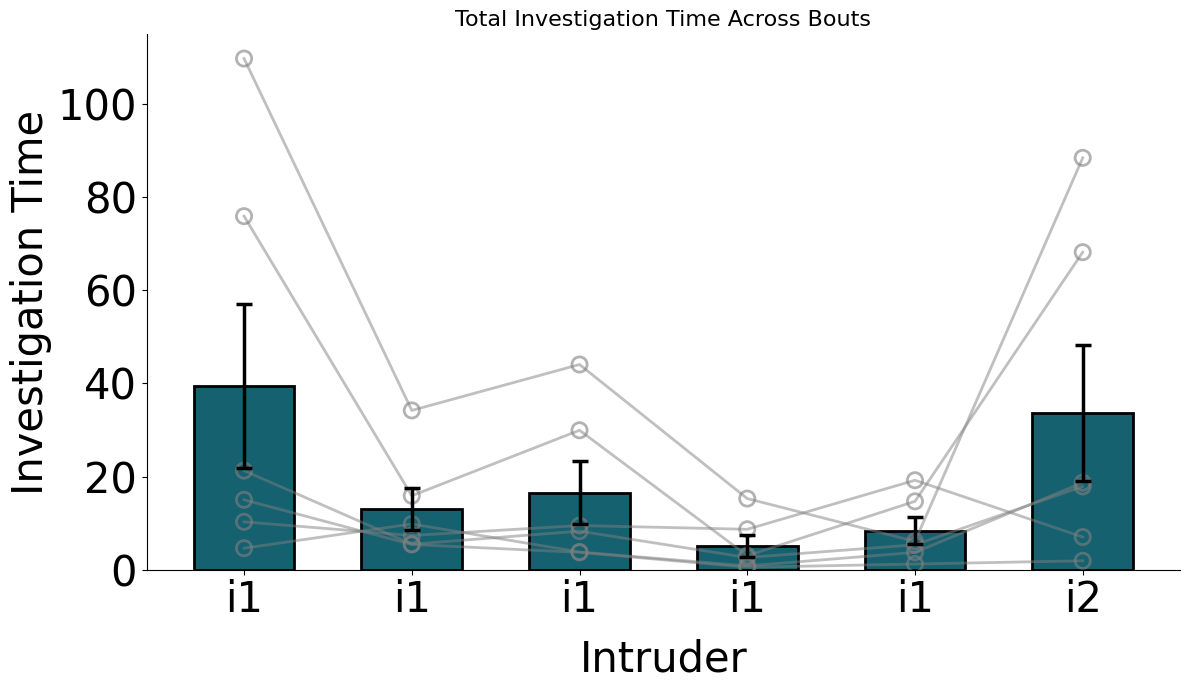

In [6]:
bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5','s2_1']
custom_xtick_labels = ['i1', 'i1','i1','i1','i1','i2',]
avg_inv_tot_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=bouts, behavior = 'Investigation')

# custom_xtick_labels = ['i1','i1','i1','i1''i1','i1','i2']
# avg_inv_tot_duration_df
plot_y_across_bouts_gray(avg_inv_tot_duration_df, 'Total Investigation Time Across Bouts','Investigation Time',custom_xtick_labels=custom_xtick_labels,bar_color=brain_region, xlabel = 'Intruder',ylim=(0,115))

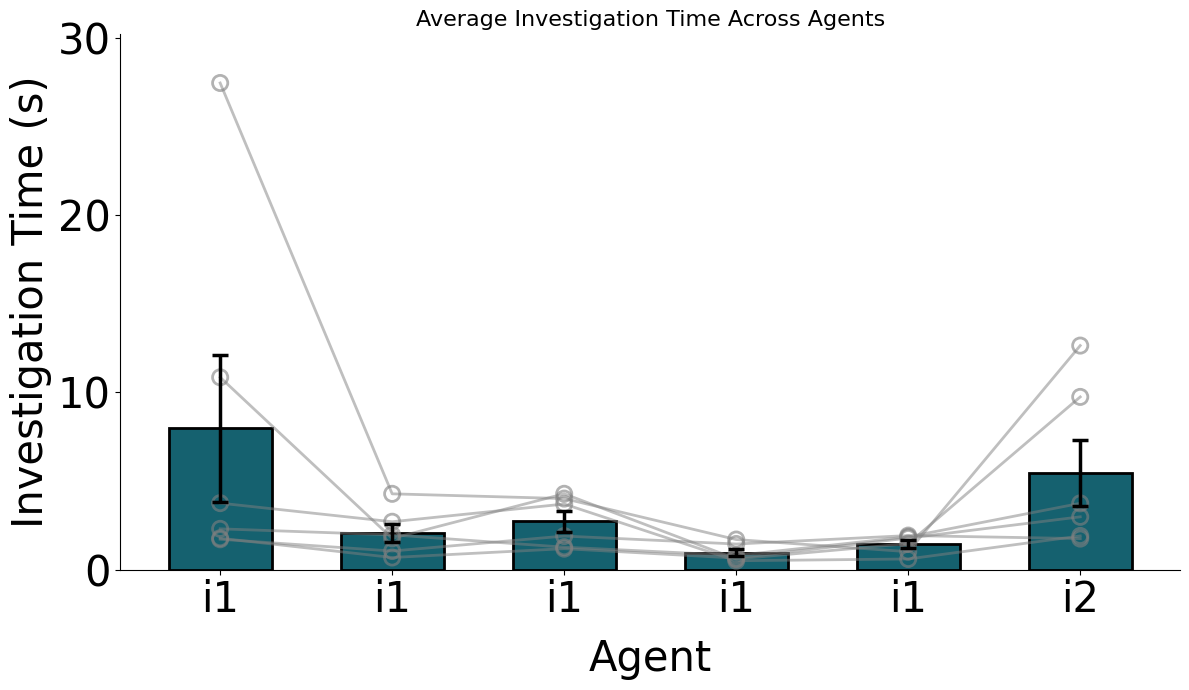

In [7]:
bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5','s2_1']
custom_xtick_labels = ['i1', 'i1','i1','i1','i1','i2',]
# Extract average investigation durations
avg_inv_duration_df = extract_average_behavior_durations(group_data=group_data, bouts=bouts, behavior='Investigation')

plot_y_across_bouts_gray(avg_inv_duration_df, 'Average Investigation Time Across Agents','Investigation Time (s)', custom_xtick_labels=custom_xtick_labels,bar_color=brain_region)


## Mean DA During 1st Investigation

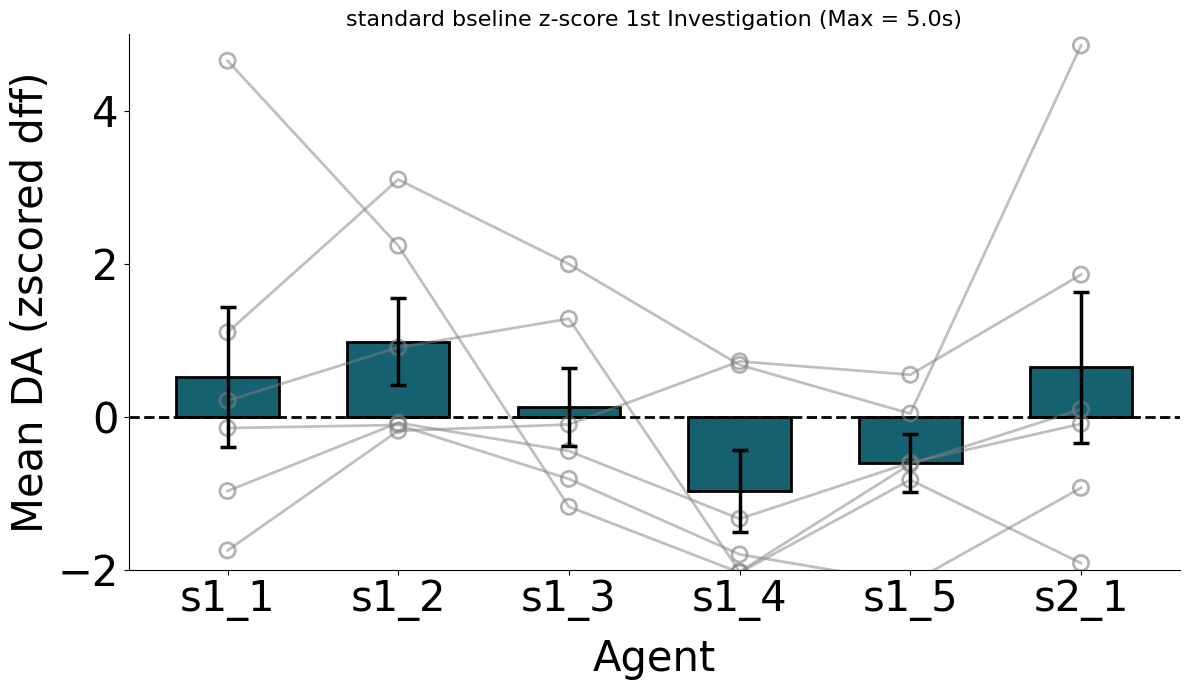

In [8]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=bouts, behavior='Investigation', n=1, max_duration=0.6)

plot_y_across_bouts_gray(inv_1st_mean_df, 'standard bseline z-score 1st Investigation (Max = 5.0s)','Mean DA (zscored dff)',bar_color=brain_region,ylim=(-2,5))


## PETHC CODE

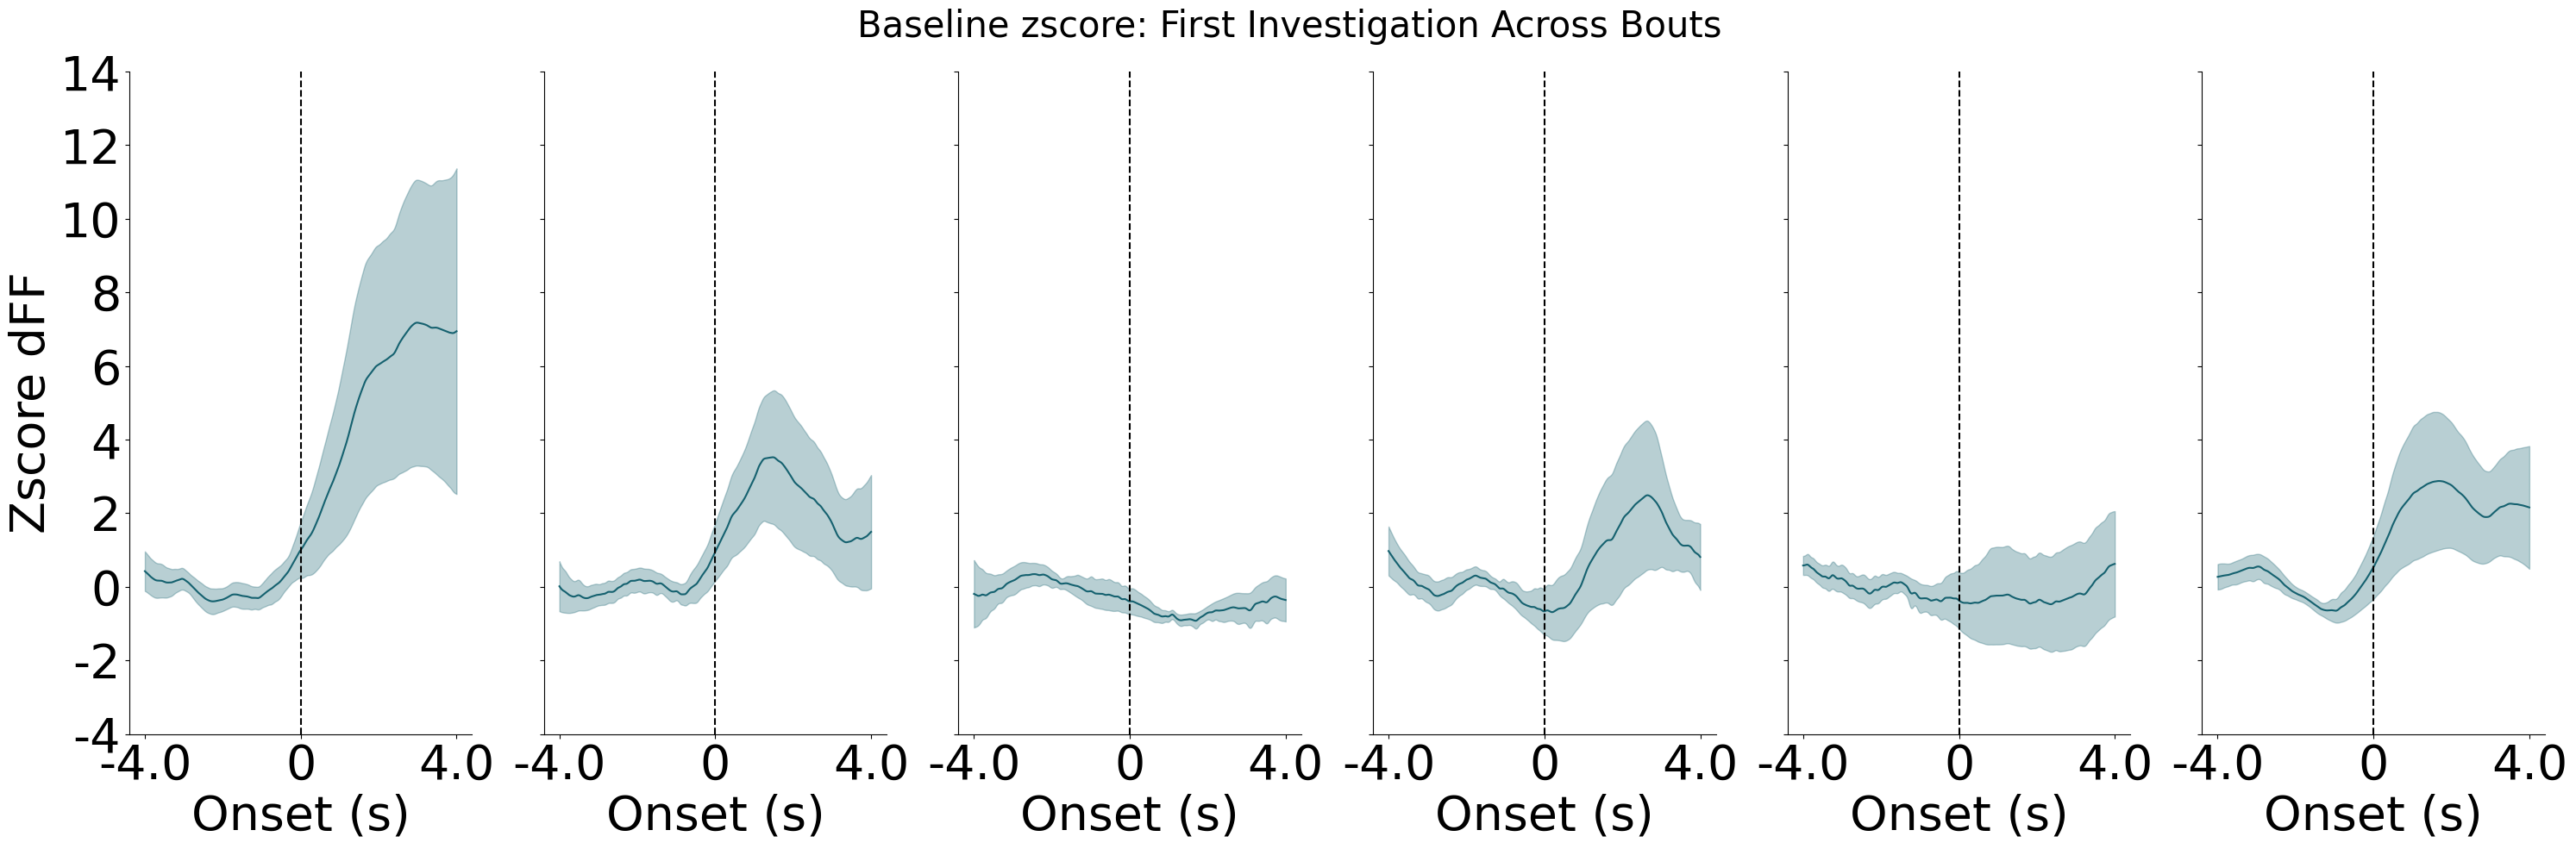

In [9]:
group_data.compute_nth_bout_peth_all_blocks(behavior_name='Investigation', nth_occurrence=1, bouts=bouts, pre_time=4, post_time=4)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=bouts,
                                title='Baseline zscore: First Investigation Across Bouts',color=brain_region
                                ,display_pre_time=4, display_post_time=4)


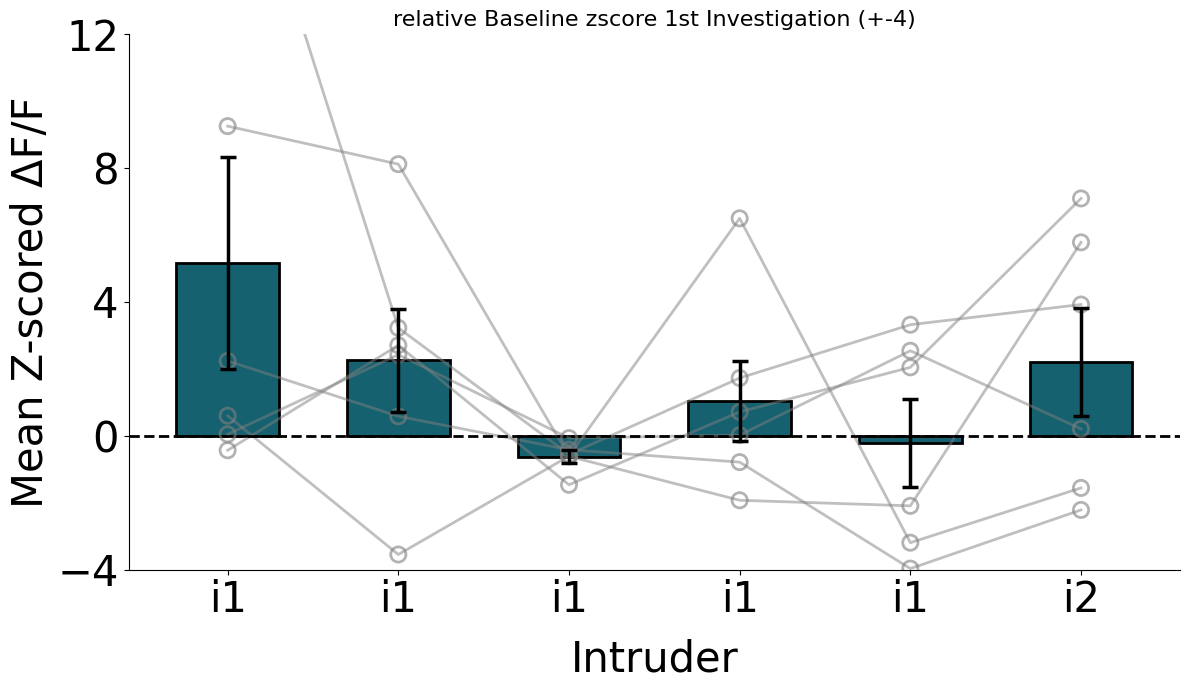

In [26]:
custom_labels = ['i1','i1','i1','i1','i1','i2']
df = extract_nth_behavior_mean_baseline_peth(group_data=group_data, bouts=bouts,behavior='Investigation',n=1, windows=[(0,4)], pre_time=4, post_time=4)
plot_y_across_bouts_gray(df,title='relative Baseline zscore 1st Investigation (+-4)',ylabel='Mean Z-scored ΔF/F', custom_xtick_labels = custom_labels,bar_color=brain_region, ylim= (-4, 10), yticks_increment=4, xlabel = 'Intruder')


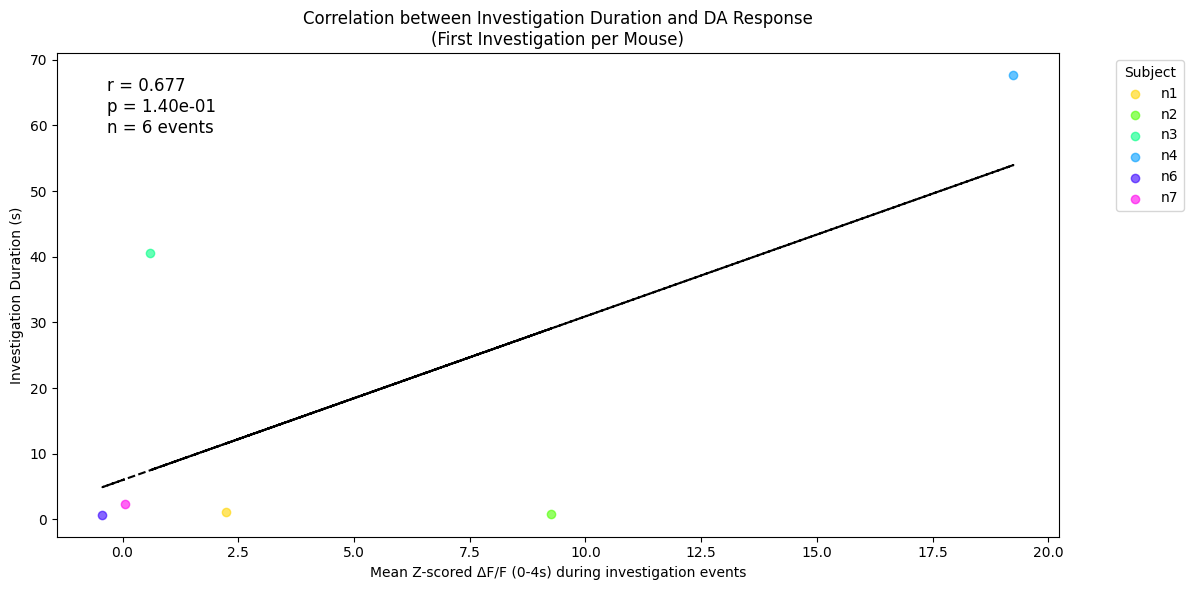

In [11]:
group_data.plot_first_investigation_vs_dff(bouts=['s1_1'])

## All Investigations

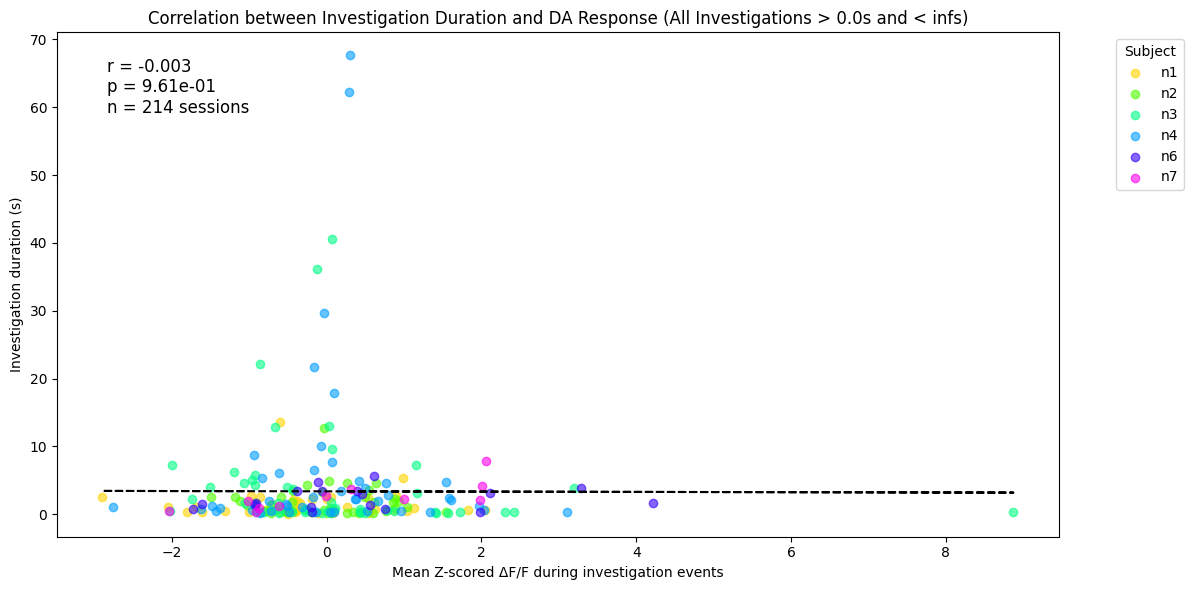

In [12]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.0, max_duration=np.inf)

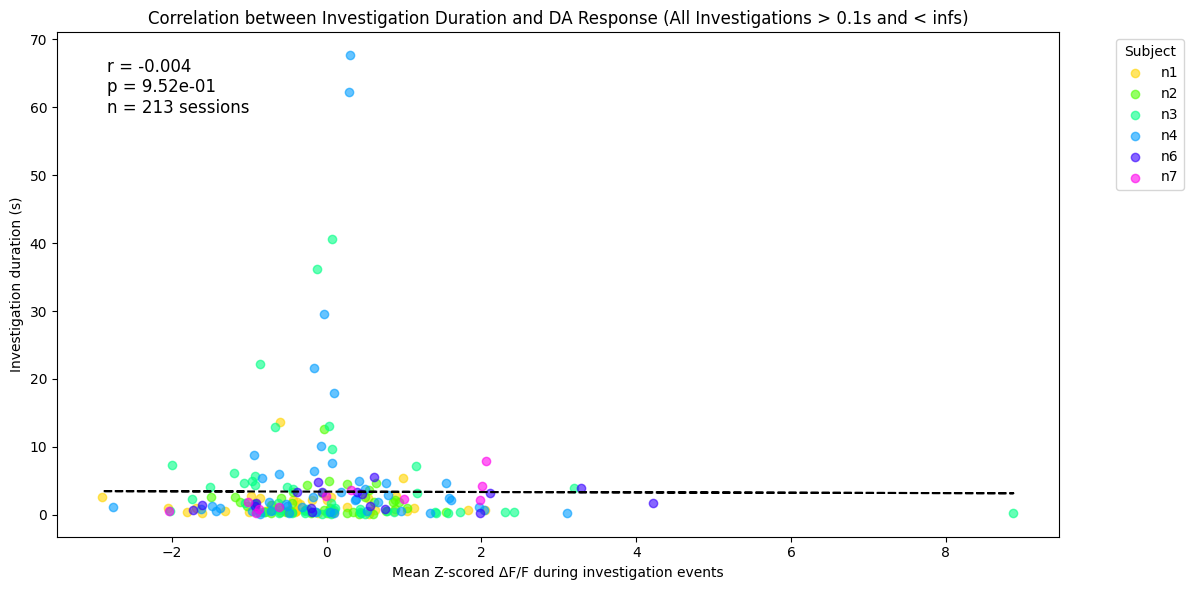

In [13]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.1, max_duration=np.inf)

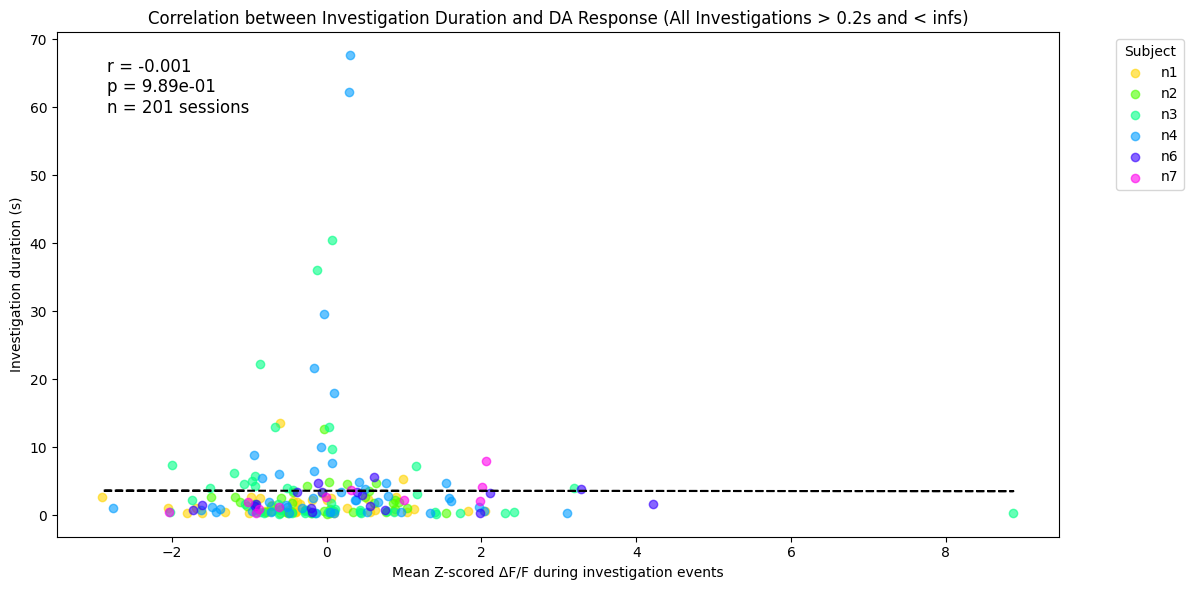

In [14]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.2, max_duration=np.inf)

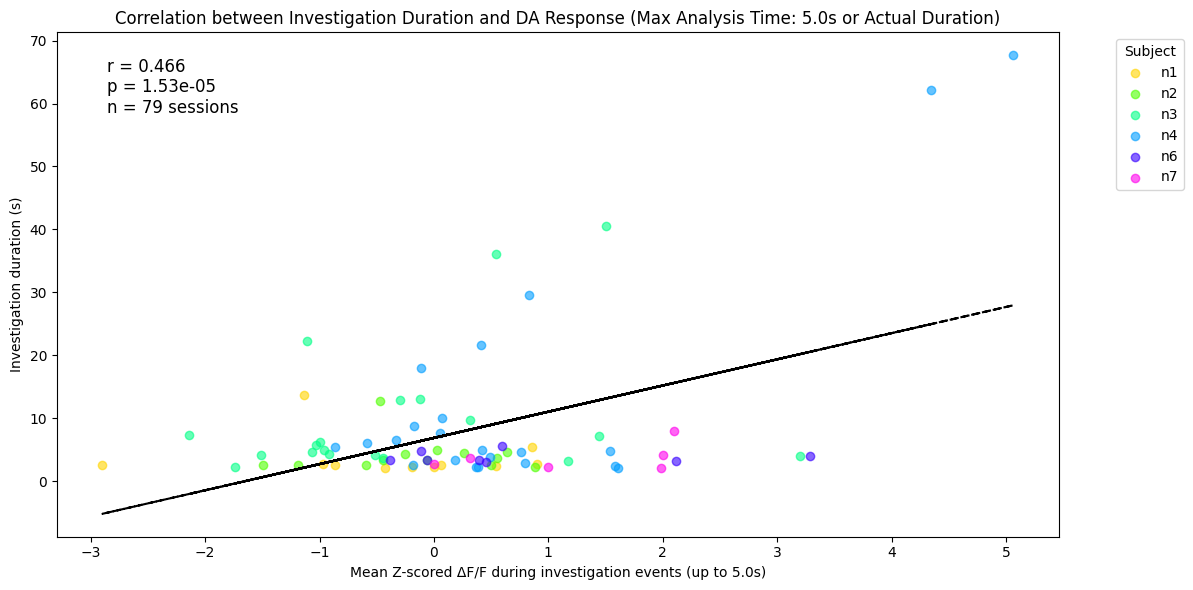

In [15]:
group_data.plot_all_behavior_vs_dff_all_with_flexible_time(behavior_name='Investigation', min_duration=2, max_analysis_time=5.0)

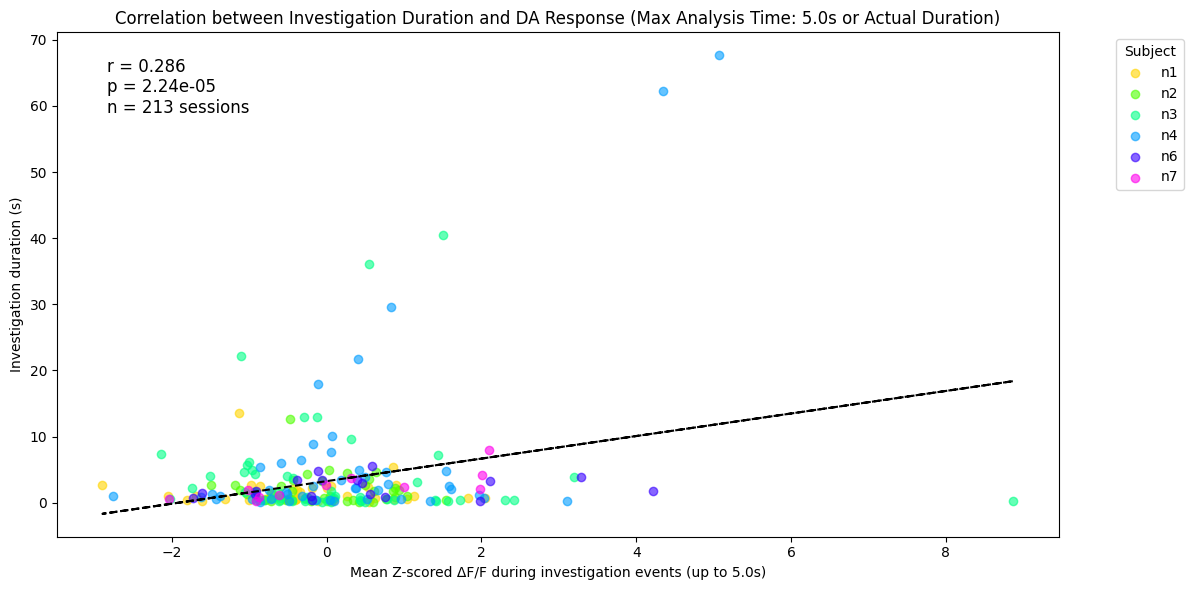

In [16]:
group_data.plot_all_behavior_vs_dff_all_with_flexible_time(behavior_name='Investigation', min_duration=0.1, max_analysis_time=5.0)

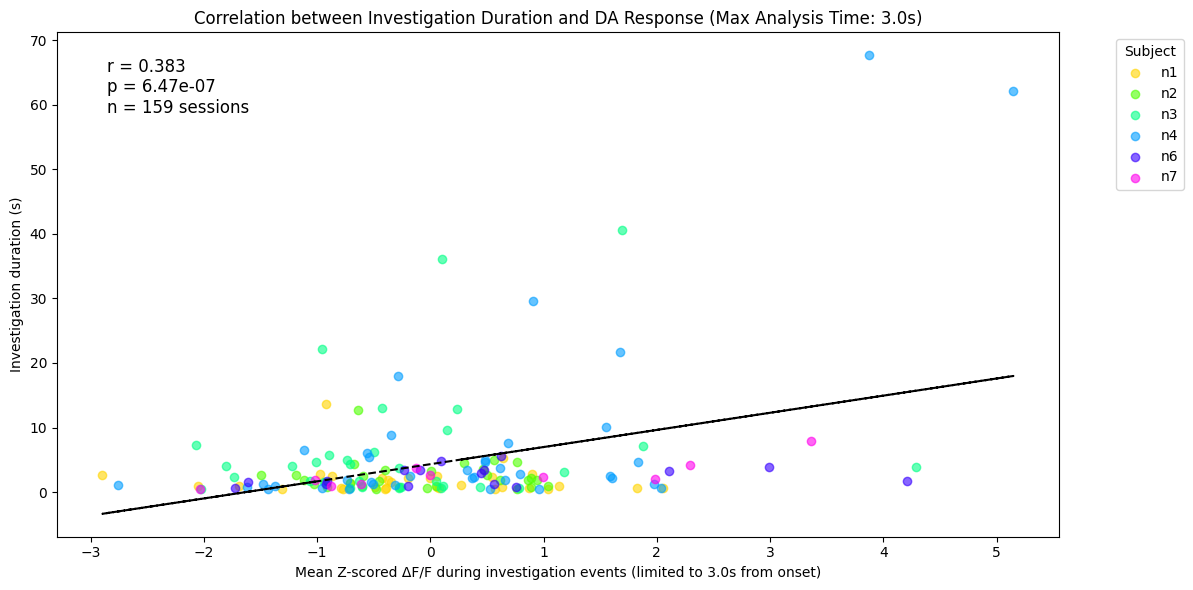

In [17]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.5, max_analysis_time=3.0)


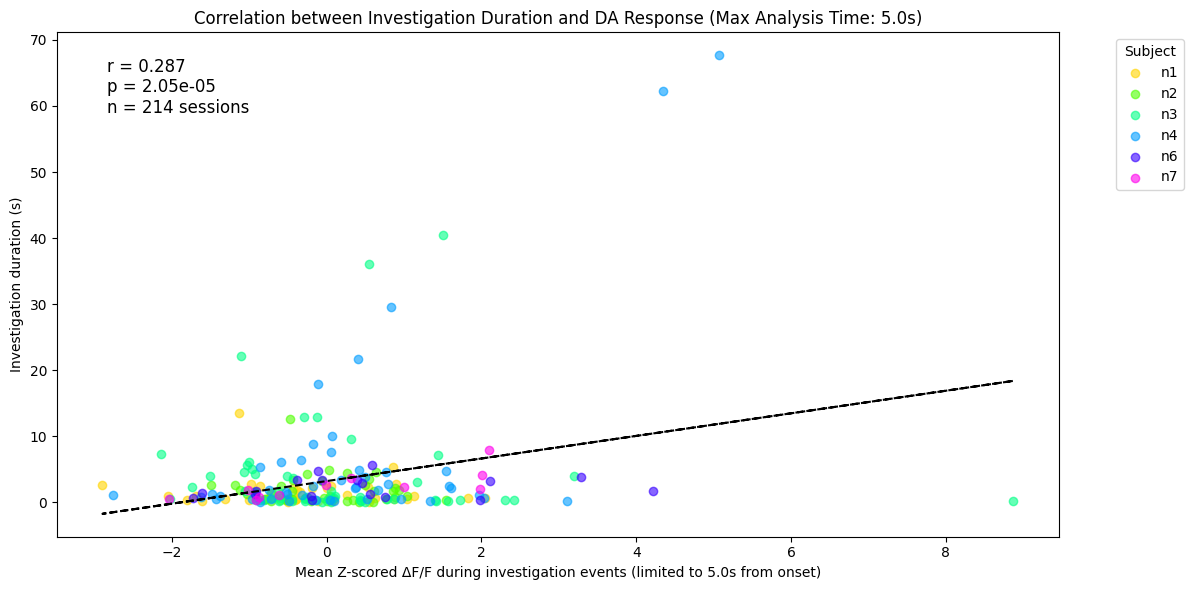

In [18]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.0, max_analysis_time=5.0)


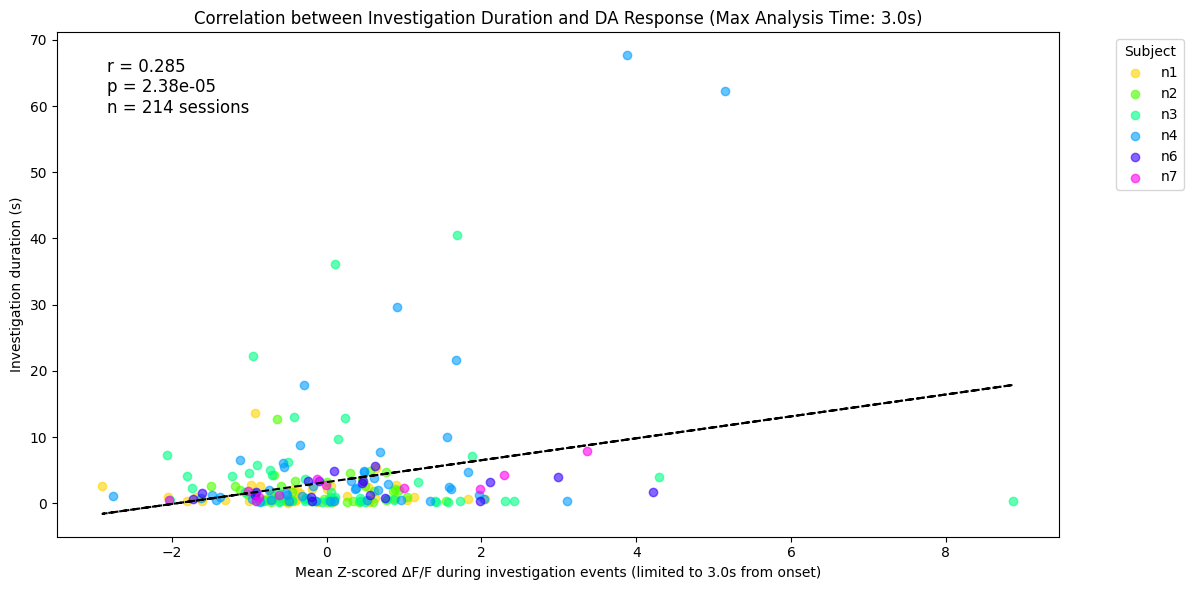

In [19]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.0, max_analysis_time=3.0)


In [20]:
group_data.plot_1st_behavior_vs_dff_all( behavior_name='Investigation', min_duration=0.15, max_duration=np.inf)

AttributeError: 'GroupTDTData' object has no attribute 'plot_1st_behavior_vs_dff_all'

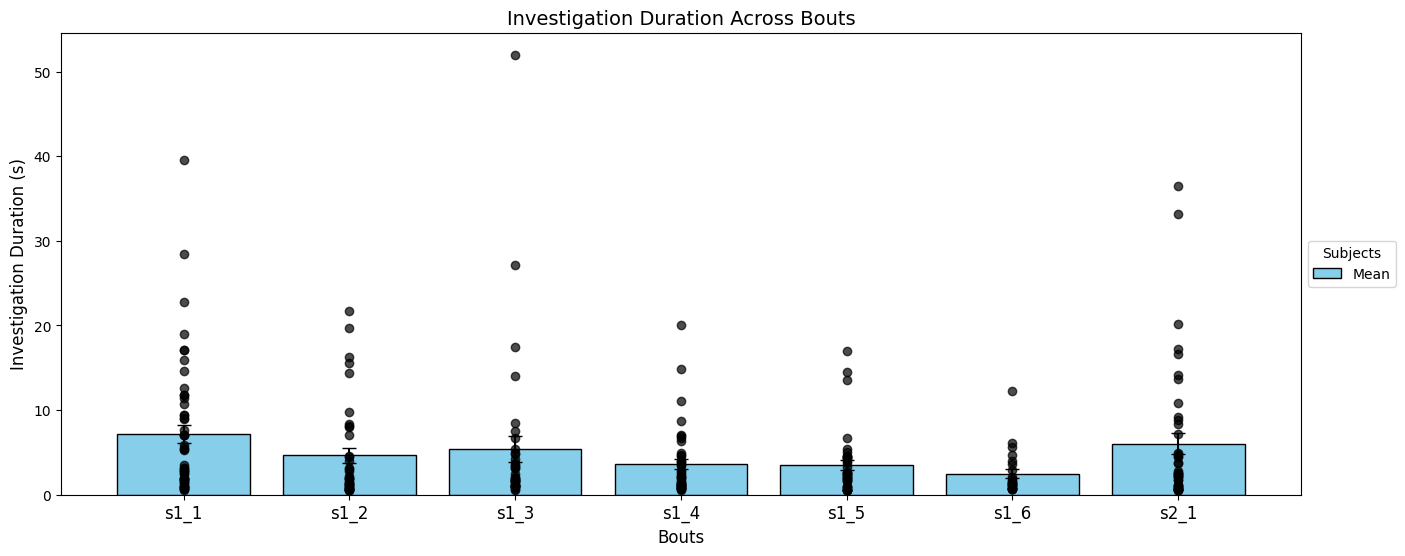

In [25]:
group_data.plot_behavior_durations_boutwise(behavior_name='Investigation', min_duration=0)

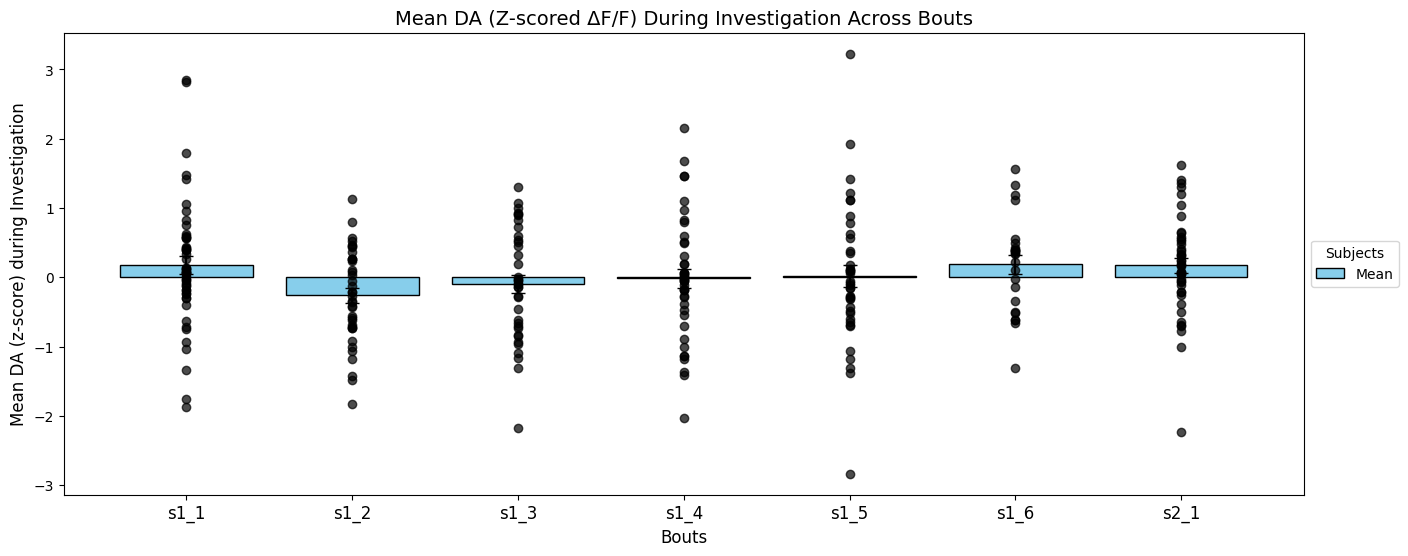

In [26]:
group_data.plot_behavior_mean_DA_boutwise(behavior_name='Investigation', min_duration=0)


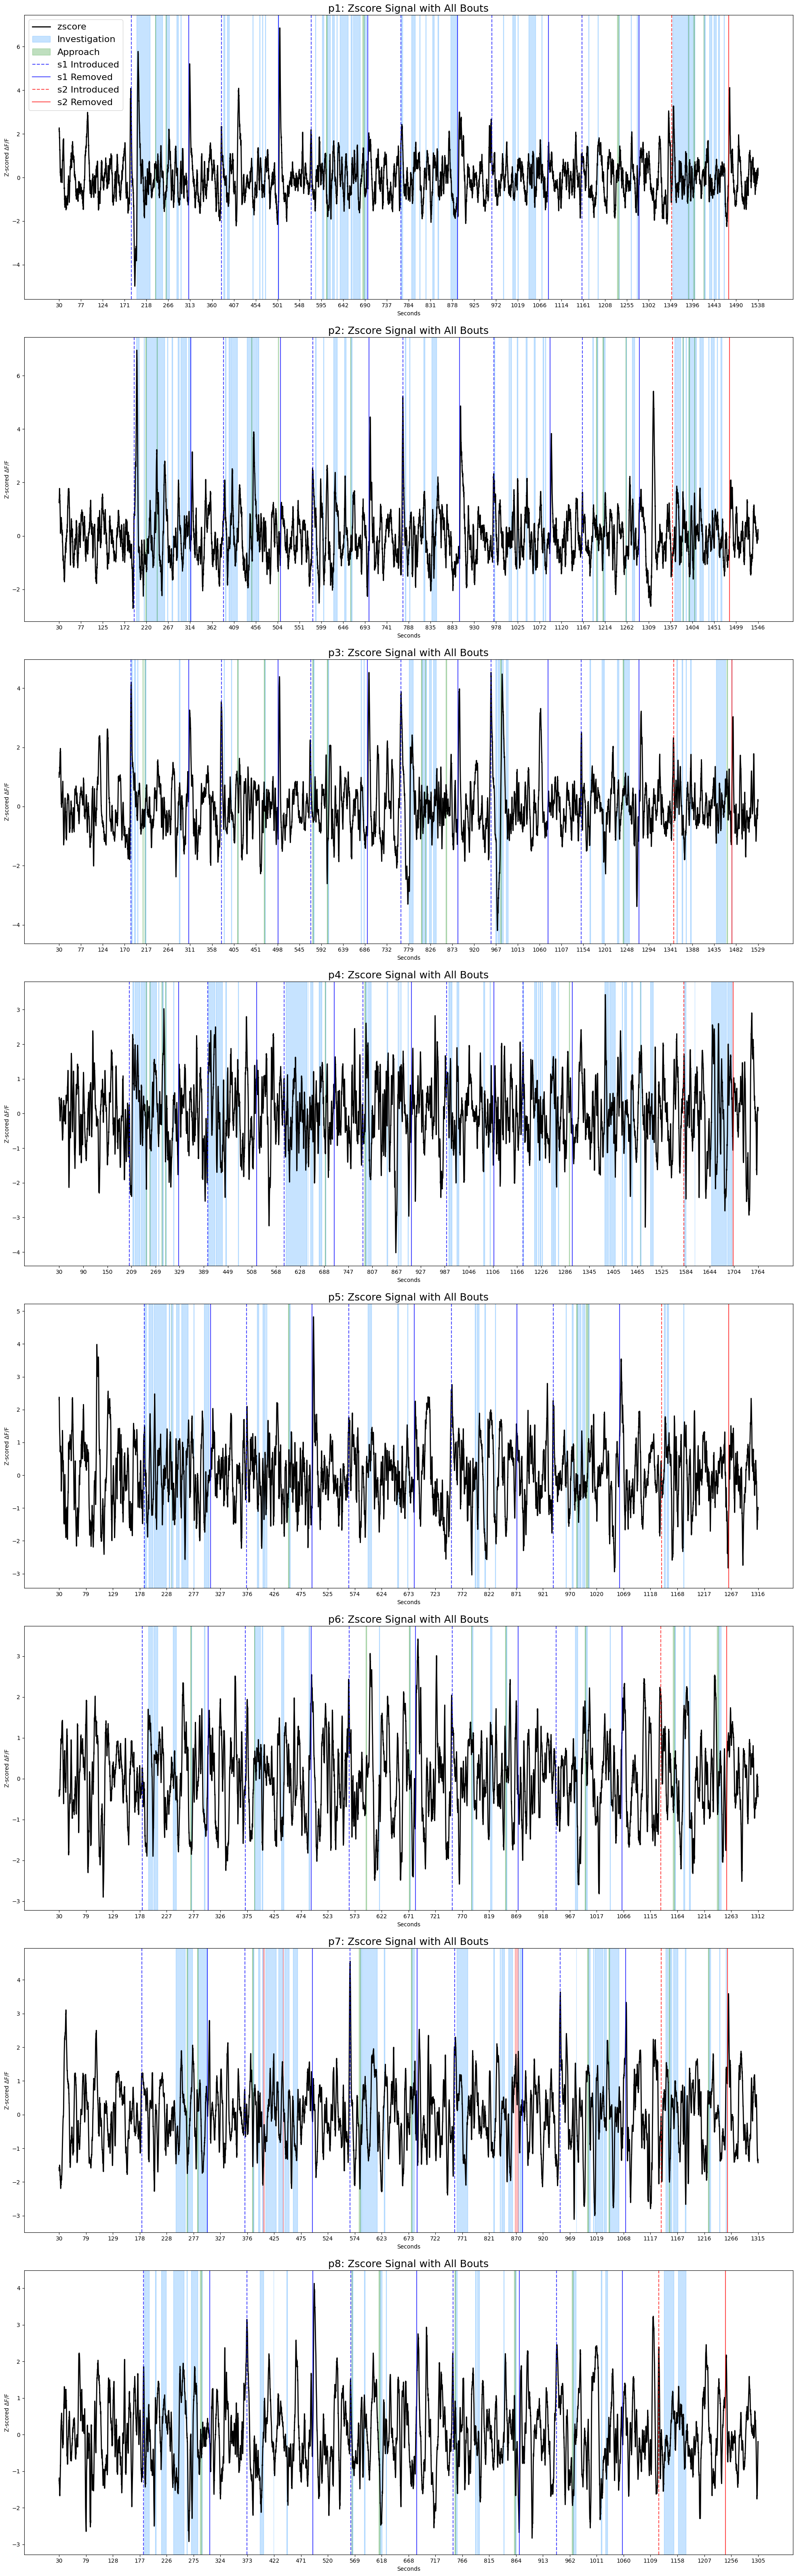

In [27]:
group_data.hab_dishab_plot_individual_behavior(behavior_name='all',plot_type='zscore',figsize=(20,8))